# α2-Selectivectivity scores analysis

## Final Project: In Silico Identification of Novel α2-selective Positive Allosteric Modulators (PAMs) for GABA-A Receptors in Anxiety Treatment

**Student:** Pablo Rodríguez López.    
**Course**: Computational Structural Biology for Lead Discovery.   
**University**: Polytechnic University of Madrid.  
**Date:** January 2026.   
**Objective:** This notebook takes the initial training set as well as the docking scores for the training compounds, merge them into a single table for the report, and also plots one vs the other to check their correlation.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load docking results
df_dock = pd.read_csv('final_scores_TRN.csv')  # adjust filename if needed
df_train = pd.read_csv('Training_set_alpha2_selective.csv')  # adjust filename if needed

In [ ]:
print(df_dock.shape)
df_dock.head()

(21, 4)


,NAME,9CT0_alpha2_score,9CRV_alpha1_score,docking_ratio
0,TRN_CHEMBL120838,-8.627,-8.932,0.9659
1,TRN_CHEMBL121277,-8.394,-8.872,0.9461
2,TRN_CHEMBL122619,-8.723,-9.535,0.9148
3,TRN_CHEMBL123530,-9.334,-8.736,1.0685
4,TRN_CHEMBL123882,-9.297,-10.250,0.9070


In [ ]:
#Remove the 'TRN_' beggining from the 'name' column
df_dock['NAME'] = df_dock['NAME'].str.replace('TRN_', '', regex=False)
df_dock.head()

,NAME,9CT0_alpha2_score,9CRV_alpha1_score,docking_ratio
0,CHEMBL120838,-8.627,-8.932,0.9659
1,CHEMBL121277,-8.394,-8.872,0.9461
2,CHEMBL122619,-8.723,-9.535,0.9148
3,CHEMBL123530,-9.334,-8.736,1.0685
4,CHEMBL123882,-9.297,-10.250,0.9070


In [ ]:
# Change the column 'NAME' for 'ChEMBL_ID'
df_dock = df_dock.rename(columns={'NAME': 'ChEMBL_ID'})
df_dock.columns

Index(['ChEMBL_ID', '9CT0_alpha2_score', '9CRV_alpha1_score', 'docking_ratio'], dtype='object')

In [ ]:
print(df_train.shape)
df_train.head()

(22, 8)


,canonical_smiles,Ki_alpha1,Ki_alpha2,ChEMBL_ID,log2_ratio,refined_label,pKi_alpha1,pKi_alpha2
0,C#Cc1ccc2c(c1)C(c1ccccc1)=NCc1c(C(=O)OCCCOC(=O...,236.0,7.4,CHEMBL505768,4.995118,alpha2-selective,6.627088,8.130768
1,c1ccc(COc2nn3c(-c4ccccc4)nnc3c3ccccc23)cc1,280.0,16.0,CHEMBL50581,4.129283,alpha2-selective,6.552842,7.795880
2,Cc1cccc(COc2nn3c(-c4nc(C(C)C)no4)nnc3c3c2C2CCC...,1000.0,68.4,CHEMBL123882,3.869860,alpha2-selective,6.000000,7.164944
3,c1ccc(-c2nnc3c4ccccc4c(OCc4ccncc4)nn23)cc1,24.0,1.7,CHEMBL52672,3.819428,alpha2-selective,7.619789,8.769551
4,COC(=O)c1cc(-c2ccc(OC)cc2)c(-c2cccnc2)n(C)c1=O,680.0,76.0,CHEMBL291335,3.161463,alpha2-selective,6.167491,7.119186


In [ ]:
df_train = df_train.rename(columns={'log2_ratio': 'log2_Ki_ratio'})
df_train.columns

Index(['canonical_smiles', 'Ki_alpha1', 'Ki_alpha2', 'ChEMBL_ID',
       'log2_Ki_ratio', 'refined_label', 'pKi_alpha1', 'pKi_alpha2'],
      dtype='object')

In [ ]:
# Merge on the cleaned names
df_merged = df_dock.merge(df_train[['ChEMBL_ID', 'log2_Ki_ratio', 'pKi_alpha1','pKi_alpha2']],
                         left_on='ChEMBL_ID', right_on='ChEMBL_ID',
                         how='inner')
# Compare lengths
print(f"Length of df_dock: {len(df_dock)}")
print(f"Length of df_train: {len(df_train)}")
print(f"Length of df_merged: {len(df_merged)}")


# Select and reorder columns
df_merged = df_merged[['ChEMBL_ID','pKi_alpha1','pKi_alpha2','log2_Ki_ratio','9CT0_alpha2_score','9CRV_alpha1_score',
                       'docking_ratio']].copy()

# Sort by docking_ratio descending
df_merged = df_merged.sort_values('docking_ratio', ascending=False)

Length of df_dock: 21
Length of df_train: 22
Length of df_merged: 21


In [ ]:
# Save sorted table
df_merged.to_csv('training_merged_results_sorted.csv', index=False)
print("Training set table saved to training_docking_sorted.tsv")
df_merged.round(3).to_csv('training_merged_results_sorted_rounded.csv',index=False)
print(df_merged.round(3))

Training set table saved to training_docking_sorted.tsv
       ChEMBL_ID  pKi_alpha1  pKi_alpha2  log2_Ki_ratio  9CT0_alpha2_score  \
7   CHEMBL179474       8.009       8.699          2.293             -9.314   
6   CHEMBL178738       6.886       7.620          2.437             -8.583   
3   CHEMBL123530       6.553       7.244          2.296             -9.334   
19  CHEMBL522055       6.542       7.347          2.673             -7.414   
15  CHEMBL361105       6.585       7.268          2.267             -8.502   
14  CHEMBL361015       7.071       7.824          2.503             -9.716   
16  CHEMBL432542       6.573       7.310          2.446             -6.406   
10  CHEMBL305068       7.131       7.775          2.139             -9.155   
5    CHEMBL17574       6.783       7.509          2.412             -6.336   
17  CHEMBL505768       6.627       8.131          4.995             -8.336   
13  CHEMBL360733       7.032       7.721          2.291             -9.381   
8   CHEM

In [ ]:
# show table without the row index


,ChEMBL_ID,pKi_alpha1,pKi_alpha2,log2_Ki_ratio,9CT0_alpha2_score,9CRV_alpha1_score,docking_ratio
0,CHEMBL179474,8.009,8.699,2.293,-9.314,-8.568,1.087
1,CHEMBL178738,6.886,7.620,2.437,-8.583,-7.943,1.081
2,CHEMBL123530,6.553,7.244,2.296,-9.334,-8.736,1.068
3,CHEMBL522055,6.542,7.347,2.673,-7.414,-7.214,1.028
4,CHEMBL361105,6.585,7.268,2.267,-8.502,-8.341,1.019
5,CHEMBL361015,7.071,7.824,2.503,-9.716,-9.535,1.019
6,CHEMBL432542,6.573,7.310,2.446,-6.406,-6.304,1.016
7,CHEMBL305068,7.131,7.775,2.139,-9.155,-9.092,1.007
8,CHEMBL17574,6.783,7.509,2.412,-6.336,-6.297,1.006
9,CHEMBL505768,6.627,8.131,4.995,-8.336,-8.400,0.992


In [ ]:
# Save this table
df_merged.to_csv('training_merged_results.csv', index=False)
print("Training set table saved to training_docking.tsv")

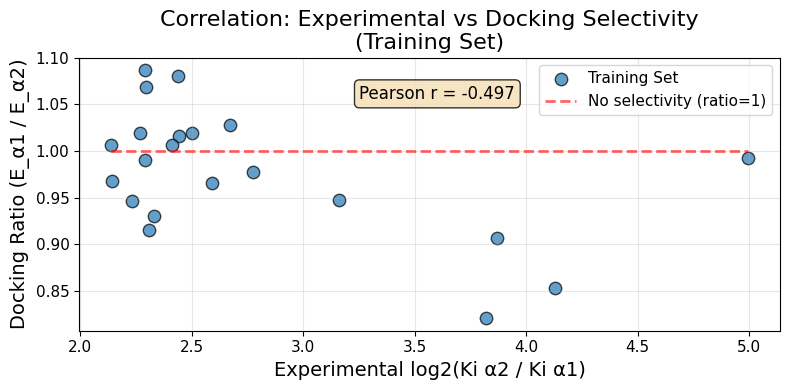


Correlation coefficient: -0.497


In [ ]:
# Plot correlation
plt.figure(figsize=(8, 4))
scatter = plt.scatter(df_merged['log2_Ki_ratio'], df_merged['docking_ratio'],
                      alpha=0.7, s=80, edgecolor='black', label='Training Set')

# No selectivity line (red dashed)
plt.plot([df_merged['log2_Ki_ratio'].min(), df_merged['log2_Ki_ratio'].max()],
         [1, 1], 'r--', alpha=0.6, linewidth=2, label='No selectivity (ratio=1)')

plt.xlabel('Experimental log2(Ki α2 / Ki α1)', fontsize=14)
plt.ylabel('Docking Ratio (E_α1 / E_α2)', fontsize=14)
plt.title('Correlation: Experimental vs Docking Selectivity\n(Training Set)', fontsize=16)
# ticks label size
plt.tick_params(axis='both', labelsize=11)
plt.grid(True, alpha=0.3)

# Correlation coefficient in legend
corr = df_merged['log2_Ki_ratio'].corr(df_merged['docking_ratio'])
plt.legend(loc='upper right', fontsize=11)
plt.text(0.40, 0.90, f'Pearson r = {corr:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nCorrelation coefficient: {corr:.3f}")
